In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline 

In [128]:
#data = pd.ExcelFile()
data = pd.read_excel('Earthquake Damage Data.xlsx', 'Data')
data.head()

,ID,P1,P2,P3,P4,P5,P6,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,DS
0,1,0.733800,0.588313,0.824660,0.420993,0.00,0.599542,0.257812,0,0.0,0,0.8,1.0,0.000000,0.827586,4
1,2,0.738113,0.604497,0.477239,0.252442,0.75,0.544622,0.148438,0,0.0,1,0.8,1.0,0.666667,0.931034,1
2,3,0.742815,0.602485,0.755395,0.434462,0.75,0.560641,0.093750,1,1.0,1,0.8,1.0,0.000000,0.655172,1
3,4,0.739635,0.602389,0.768629,0.484940,0.75,0.556064,0.148438,0,0.0,0,0.8,1.0,0.000000,0.965517,1
4,5,0.740052,0.605121,0.783227,0.486592,0.75,0.542334,0.148438,0,0.0,1,0.8,0.5,0.666667,0.931034,1


In [129]:
encode_array = OneHotEncoder()
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values
y = data.iloc[:,15].values

print (x.shape)
print (y.shape)

(30590, 14)
(30590,)


In [130]:

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y_data
)
# 获取维度参数
num_features = x_train.shape[1]  # 特征数量（14）
num_classes = len(np.unique(y))  # 类别数量（3）


In [131]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

## KNN

In [132]:
model_KNN = KNeighborsClassifier(n_neighbors = 2)
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [133]:
y_pred_KNN = model_KNN.predict(x_test)

In [134]:
cm=confusion_matrix(y_test, y_pred_KNN)
print("Accuracy:", accuracy_score(y_test, y_pred_KNN))
print("\nClassification Report:\n", classification_report(y_test, y_pred_KNN))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_KNN))

Accuracy: 0.897025171624714

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.98      0.95      5539
           2       0.27      0.12      0.17        24
           3       0.11      0.03      0.04        37
           4       0.34      0.08      0.14       518

    accuracy                           0.90      6118
   macro avg       0.41      0.30      0.32      6118
weighted avg       0.86      0.90      0.87      6118


Confusion Matrix:
 [[5440    8    7   84]
 [  21    3    0    0]
 [  35    0    1    1]
 [ 473    0    1   44]]


# SVM

In [135]:
model_SVM = svm.SVC(kernel='linear')
model_SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [136]:
y_pred_SVM = model_SVM.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_SVM))
print("\nClassification Report:\n", classification_report(y_test, y_pred_SVM))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_SVM))

Accuracy: 0.9053612291598562

Classification Report:
               precision    recall  f1-score   support

           1       0.91      1.00      0.95      5539
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00       518

    accuracy                           0.91      6118
   macro avg       0.23      0.25      0.24      6118
weighted avg       0.82      0.91      0.86      6118


Confusion Matrix:
 [[5539    0    0    0]
 [  24    0    0    0]
 [  37    0    0    0]
 [ 518    0    0    0]]


d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# linear regression

In [137]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("预测值示例:", y_pred_lr[:5])

预测值示例: [1.05470751 1.17007976 1.49089912 1.21049263 1.33937797]


#### 预测值是分数（连续数值），而不是离散的类别标签 ​线性回归模型（LinearRegression）​，而线性回归是专门用于解决 ​回归任务 的模型（预测连续值）

In [138]:

# print("Accuracy:", accuracy_score(y_test, y_pred_lr))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# logistic regression

In [139]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(multi_class='multinomial', max_iter=1000)
model_lg.fit(x_train, y_train)
y_pred_lg = model_lg.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lg))

Accuracy: 0.9053612291598562

Classification Report:
               precision    recall  f1-score   support

           1       0.91      1.00      0.95      5539
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00       518

    accuracy                           0.91      6118
   macro avg       0.23      0.25      0.24      6118
weighted avg       0.82      0.91      0.86      6118


Confusion Matrix:
 [[5539    0    0    0]
 [  24    0    0    0]
 [  37    0    0    0]
 [ 518    0    0    0]]


d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill

# Naive bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
model_nv = GaussianNB()
model_nv.fit(x_train, y_train)
y_pred_nv = model_nv.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nv))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nv))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nv))

Accuracy: 0.4818568159529258

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.50      0.65      5539
           2       0.01      0.96      0.02        24
           3       0.00      0.00      0.00        37
           4       0.14      0.27      0.19       518

    accuracy                           0.48      6118
   macro avg       0.27      0.43      0.21      6118
weighted avg       0.84      0.48      0.60      6118


Confusion Matrix:
 [[2784 1922    5  828]
 [   1   23    0    0]
 [  18    5    0   14]
 [ 252  125    0  141]]


# Decision tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'  # 自动平衡类别权重
)
model_DT.fit(x_train, y_train)
y_pred_DT = model_DT.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_DT))

Accuracy: 0.861882968290291

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.93      0.92      5539
           2       0.05      0.04      0.04        24
           3       0.04      0.03      0.03        37
           4       0.28      0.28      0.28       518

    accuracy                           0.86      6118
   macro avg       0.32      0.32      0.32      6118
weighted avg       0.86      0.86      0.86      6118


Confusion Matrix:
 [[5124   20   22  373]
 [  18    1    0    5]
 [  32    0    1    4]
 [ 368    0    3  147]]


# ANN(MLP)

In [142]:
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier(
    hidden_layer_sizes=(50, 20),  # 隐藏层结构
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
   
)

model_MLP.fit(x_train, y_train)
y_pred_MLP = model_MLP.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_MLP))
print("\nClassification Report:\n", classification_report(y_test, y_pred_MLP))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_MLP))

Accuracy: 0.9037267080745341

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.99      0.95      5539
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        37
           4       0.45      0.10      0.16       518

    accuracy                           0.90      6118
   macro avg       0.34      0.27      0.28      6118
weighted avg       0.86      0.90      0.87      6118


Confusion Matrix:
 [[5479    0    0   60]
 [  24    0    0    0]
 [  36    0    0    1]
 [ 468    0    0   50]]


d:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

# CNN

In [143]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 构建 1D-CNN 模型
model_CNN = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', 
                  kernel_regularizer=regularizers.l2(0.001),
                  input_shape=(14, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_CNN.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 训练
history = model_CNN.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 预测与评估
y_pred_CNN = model_CNN.predict(x_test)
y_pred_CNN = np.argmax(y_pred_CNN, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_CNN))
print("\nClassification Report:\n", classification_report(y_test, y_pred_CNN))

Epoch 1/30


d:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7787 - loss: 0.8674 - val_accuracy: 0.9015 - val_loss: 0.3445
Epoch 2/30
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9037 - loss: 0.3708 - val_accuracy: 0.9017 - val_loss: 0.3349
Epoch 3/30
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9048 - loss: 0.3543 - val_accuracy: 0.9015 - val_loss: 0.3329
Epoch 4/30
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9076 - loss: 0.3417 - val_accuracy: 0.9015 - val_loss: 0.3269
Epoch 5/30
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9051 - loss: 0.3371 - val_accuracy: 0.9015 - val_loss: 0.3256
Epoch 6/30
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9106 - loss: 0.3246 - val_accuracy: 0.9015 - val_loss: 0.3279
Epoch 7/30
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9046 - loss: 0.3378 - val_accuracy: 0.9015 - val_loss: 0.3244
Epoch 8/30
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9038 - loss: 0.3330 - val_accuracy: 0.9026 - val_

d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBOOST

In [144]:
!pip  install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [145]:

from xgboost import XGBClassifier
model_XG = XGBClassifier()
model_XG.fit(x_train.squeeze(), y_train-1)
y_pred_XG = model_XG.predict(x_test.squeeze())


print("Accuracy:", accuracy_score(y_test-1, y_pred_XG))
print("\nClassification Report:\n", classification_report(y_test-1, y_pred_XG))
print("\nConfusion Matrix:\n", confusion_matrix(y_test-1, y_pred_XG))

Accuracy: 0.9048708728342596

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5539
           1       0.25      0.04      0.07        24
           2       0.33      0.03      0.05        37
           3       0.50      0.11      0.18       518

    accuracy                           0.90      6118
   macro avg       0.50      0.29      0.31      6118
weighted avg       0.87      0.90      0.88      6118


Confusion Matrix:
 [[5478    3    2   56]
 [  23    1    0    0]
 [  36    0    1    0]
 [ 462    0    0   56]]


# ANN(moedel2)

In [146]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载数据
data = pd.read_excel('Earthquake Damage Data.xlsx', sheet_name='Data')
feature_columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'BC7', 'BC8']
target_column = 'DS'

# 提取特征和标签
x_data = data[feature_columns].values.astype(np.float32)
y_data = data[target_column].values - 1  # 转换为0-based整数标签（如0,1,2）

# 转换为one-hot编码
num_classes = len(np.unique(y_data))
y_onehot = to_categorical(y_data, num_classes=num_classes)  # 形状：(n_samples, num_classes)

# 分割数据集
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_onehot, test_size=0.2, random_state=42, stratify=y_data
)

# 标准化特征
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(input_dim, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')  # 输出层节点数=类别数，激活函数=softmax
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',  # 必须使用categorical_crossentropy适配one-hot标签
        metrics=['accuracy']
    )
    return model

# 实例化模型
model = build_model(input_dim=x_train.shape[1], num_classes=num_classes)
model.summary()
history = model.fit(
    x_train, y_train,  # 直接使用one-hot编码的y_train
    batch_size=32,
    epochs=50,
    validation_data=(x_test, y_test),  # 验证数据同样使用one-hot格式
    verbose=1
)
from sklearn.metrics import classification_report

# 预测测试集
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # 将one-hot预测结果转换为类别索引

# 将one-hot标签的y_test转换回类别索引
y_test_classes = np.argmax(y_test, axis=1)

# 输出分类报告
print(classification_report(y_test_classes, y_pred_classes))

d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,172 (12.39 KB)

 Trainable params: 3,172 (12.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8398 - loss: 0.5054 - val_accuracy: 0.9027 - val_loss: 0.3379
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9040 - loss: 0.3232 - val_accuracy: 0.9049 - val_loss: 0.3242
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9065 - loss: 0.3151 - val_accuracy: 0.9045 - val_loss: 0.3202
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9065 - loss: 0.3080 - val_accuracy: 0.9052 - val_loss: 0.3154
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.3065 - val_accuracy: 0.9041 - val_loss: 0.3144
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9051 - loss: 0.3041 - val_accuracy: 0.9052 - val_loss: 0.3144
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9098 - loss: 0.2886 - val_accuracy: 0.9057 - val_loss: 0.3105
Epoch 8/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9044 - loss: 0.3036 - val_accuracy: 

# U-NET

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 14, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_55 (Conv1D)  │ (None, 14, 32)    │        128 │ input_layer_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 32)    │        128 │ conv1d_55[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_38    │ (None, 7, 32)     │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_56 (Conv1D)  │ (None, 7, 64)     │      6,208 │ max_pooling1d_38… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 64)     │        256 │ conv1d_56[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_39    │ (None, 3, 64)     │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_57 (Conv1D)  │ (None, 3, 128)    │     24,704 │ max_pooling1d_39… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 128)    │        512 │ conv1d_57[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_transpose_4  │ (None, 7, 128)    │     49,280 │ batch_normalizat… │
│ (Conv1DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 7, 160)    │          0 │ conv1d_transpose… │
│ (Concatenate)       │                   │            │ max_pooling1d_38… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_58 (Conv1D)  │ (None, 7, 64)     │     30,784 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 448)       │          0 │ conv1d_58[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 128)       │     57,472 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_34          │ (None, 128)       │          0 │ dense_35[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 4)         │        516 │ dropout_34[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 169,988 (664.02 KB)

 Trainable params: 169,540 (662.27 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3504 - loss: 1.7278 - val_accuracy: 0.2805 - val_loss: 1.4722 - learning_rate: 5.0000e-04
Epoch 2/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3048 - loss: 1.3185 - val_accuracy: 0.2990 - val_loss: 1.4091 - learning_rate: 5.0000e-04
Epoch 3/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3023 - loss: 1.2795 - val_accuracy: 0.3362 - val_loss: 1.4210 - learning_rate: 5.0000e-04
Epoch 4/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2915 - loss: 1.2537 - val_accuracy: 0.3916 - val_loss: 1.3316 - learning_rate: 5.0000e-04
Epoch 5/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3122 - loss: 1.1434 - val_accuracy: 0.3911 - val_loss: 1.3140 - learning_rate: 5.0000e-04
Epoch 6/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3410 - loss: 1.1396 - val_accuracy: 0.3892 - val_loss: 1.2292 - learning_rate: 5.0000e-04
Epoch 7/50
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 

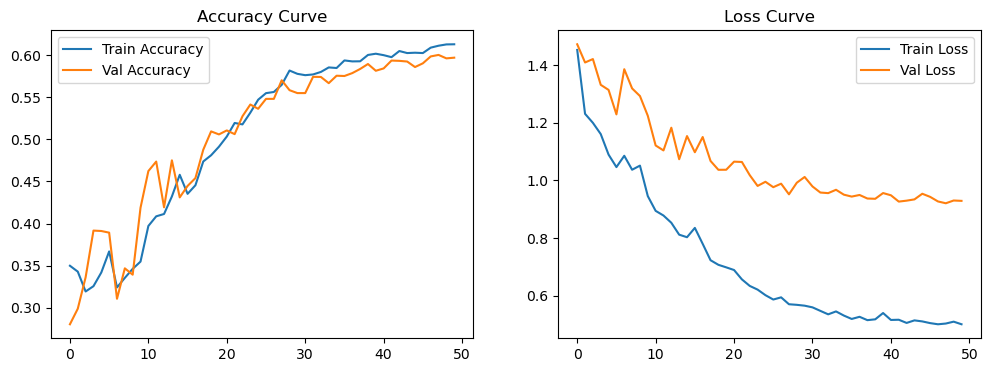

In [147]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

# 加载数据集（假设目标列是'DS'，特征为其他数值列）
data_path = 'Earthquake Damage Data.xlsx'
data = pd.read_excel(data_path, sheet_name='Data')

# 提取特征和目标列（假设'DS'是分类标签）
# 根据你的数据列名调整，例如可能需要排除ID列
feature_columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 
                   'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'BC7', 'BC8']
target_column = 'DS'

x_data = data[feature_columns].values.astype(np.float32)
y_data = data[target_column].values - 1  # 假设标签是1/2/3...，转换为0/1/2...

# 数据预处理
# 分割数据集
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# 标准化特征
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train).reshape(-1, len(feature_columns), 1)
x_test_scaled = scaler.transform(x_test).reshape(-1, len(feature_columns), 1)

# 计算类别权重（处理不平衡数据）
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)
class_weights = dict(enumerate(class_weights))

# 定义数据增强函数（针对1D时序数据）
def augment_1d(x, y):
    # 添加随机噪声
    noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=0.03)
    x = x + noise
    # 随机时间偏移（若特征具有时序性）
    shift = tf.random.uniform(shape=[], minval=-1, maxval=1, dtype=tf.int32)
    x = tf.roll(x, shift=shift, axis=1)
    return x, y

# 创建TensorFlow Dataset（训练集用增强，测试集不用）
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train))
train_dataset = train_dataset.shuffle(1000).map(augment_1d, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# 构建U-Net风格分类模型（适配14个特征）
# 构建U-Net风格分类模型（适配14个特征）
def build_unet_classifier(input_shape=(14, 1), num_classes=3):
    inputs = layers.Input(shape=input_shape)
    
    # 编码器 Encoder
    # Block 1 (输出形状: 14 → 7)
    conv1 = layers.Conv1D(32, 3, activation='relu', padding='same', 
                         kernel_regularizer=regularizers.l2(0.001))(inputs)
    conv1 = layers.BatchNormalization()(conv1)
  
    pool1 = layers.MaxPooling1D(2)(conv1)  # 输出形状: (7, 32)
    
    # Block 2 (输出形状: 7 → 3)
    conv2 = layers.Conv1D(64, 3, activation='relu', padding='same', 
                         kernel_regularizer=regularizers.l2(0.001))(pool1)
    conv2 = layers.BatchNormalization()(conv2)
   
    pool2 = layers.MaxPooling1D(2)(conv2)  # 输出形状: (3, 64)
    
    # 瓶颈层 Bottleneck (输出形状: 3)
    conv3 = layers.Conv1D(128, 3, activation='relu', padding='same', 
                         kernel_regularizer=regularizers.l2(0.001))(pool2)
    conv3 = layers.BatchNormalization()(conv3)
    
    
    # 解码器（使用Conv1DTranspose上采样）
    up1 = layers.Conv1DTranspose(
        filters=128, 
        kernel_size=3, 
        strides=2,      # 步长2，从3→7
        padding='valid'  # 修改为valid以正确计算输出长度
    )(conv3)  # 输出形状: (7, 128)
    
    # 跳跃连接（使用pool1的输出）
    concat = layers.Concatenate(axis=-1)([up1, pool1])  # 形状 (7, 128+32=160)
    
    # 分类头
    x = layers.Conv1D(64, 3, activation='relu', padding='same')(concat)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# 实例化模型（假设目标类别是3类）
model = build_unet_classifier(num_classes=len(np.unique(y_data)))
model.summary()

# 编译模型
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 定义回调函数
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# 训练模型
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=(x_test_scaled, y_test),
    callbacks=callbacks_list,
    class_weight=class_weights,
    verbose=1
)

# 评估模型
y_pred = model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Test Accuracy:", accuracy_score(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# 可视化训练过程
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# U-Net作爲圖像分割的結構，實現這樣的數值分析算法結果差强人意